In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [11]:
sigma = 15
Z = 1.96  # 95% квантиль нормального распределения
e = 3 # вероятность ложного отклонения гипотезы Н0

In [12]:
N = ((sigma*Z)/e)**2
N


96.03999999999998

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [13]:
population_men  =st.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=st.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

In [14]:
st.ttest_ind(a=population_men, b=population_women, equal_var=False)

# При уровне значимости 99,9% уровень значимости p > 0.001, соответсвтенно у нас нет оснований отвергнуть гипотезу H0

Ttest_indResult(statistic=2.543407063723651, pvalue=0.01099013577675458)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

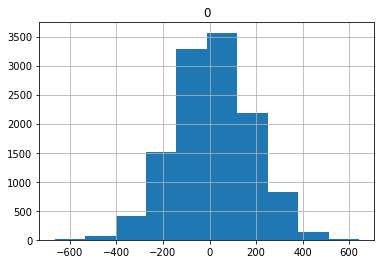

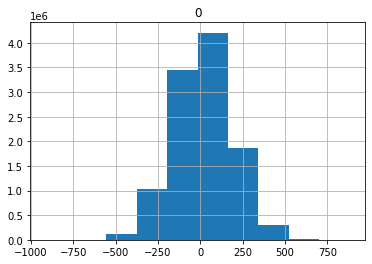

In [16]:
# В генерации данных ошибка - стандартное отклонение перепутано со средним

pd.DataFrame(population_women).hist()
pd.DataFrame(population_men).hist()

In [17]:
#меняем значения loc и scale
population_men  =st.norm.rvs(loc=171,scale=19,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=st.norm.rvs(loc=165,scale=16,size=12000)  # Выборка женщин со средним ростом 165

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

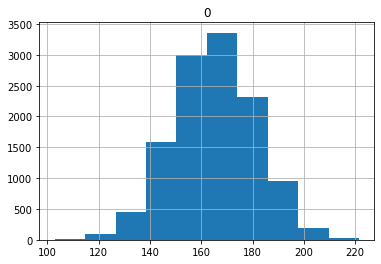

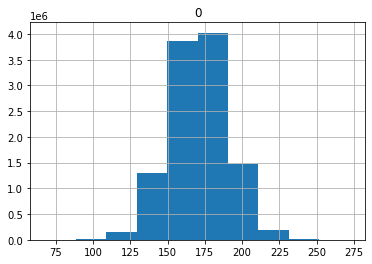

In [18]:
pd.DataFrame(population_women).hist()
pd.DataFrame(population_men).hist()

# теперь данные правильные

In [19]:
st.ttest_ind(a=population_men, b=population_women, equal_var=False)

# Теперь p-value < 0.001, что говорит о том, что у нас достаточные основания отвергнуть гипотезу H0

Ttest_indResult(statistic=40.06163338649649, pvalue=0.0)

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

In [ ]:

sigma = 150
Z = 1.96  # 95% квантиль нормального распределения
me = 50 # margin of error(critical value (t-score or a z-score) * SE)

In [20]:
N = ((sigma*Z)/me)**2
N

96.03999999999998

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду,
если уровнь значимости принять за 0.05 ?

In [21]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [25]:
oddsratio, pvalue = st.fisher_exact(observations)  # Возможно вам пригодится эта функция.

oddsratio, pvalue

#  p-value 0.083 (> 0.05), гипотеза H0 - выбор случаен
#  Недостаточно оснований опровергнуть гипотезу H0 - выбор волшебника случаен

(2.037037037037037, 0.08323639416753109)

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [32]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

35


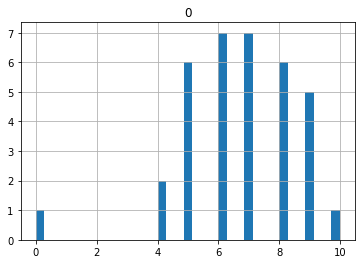

In [45]:
pd.DataFrame(data).hist(bins=len(data))
print(len(data))

# распределение не является нормальным, не унимодально и не симметрично,
# ст.отклонение генеральной совокупности неизвестно
# количество элементов > 30

In [33]:
def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    df = n-1
    m, se = np.mean(data), st.sem(data)    #среднее, sem = стандартная ошибка
    h = se * st.t.ppf((1 + confidence)/2, df)  #расчет дельты для доверительного интервала
                                                        # по распределению стьюдента
    return m-h,m, m+h


print(mean_confidence_interval(data, 0.95))

# Нельзя сказать что для распределения с такими характеристиками мы получили корректный ДИ

(5.961614036054297, 6.628571428571429, 7.295528821088561)


6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [39]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

Data_1 length: 35, Data_1 length: 93


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

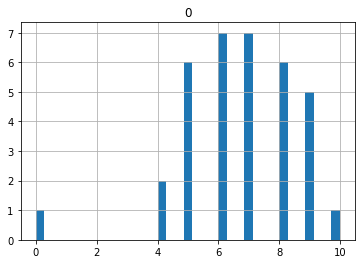

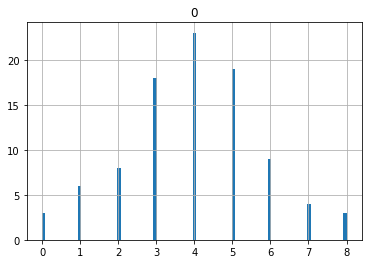

In [44]:
print(
    f'Data_1 length: {len(data_1)}, '
    f'Data_1 length: {len(data_2)}'
)

pd.DataFrame(data_1).hist(bins=len(data_1))
pd.DataFrame(data_2).hist(bins=len(data_2))

# Для Two-sample T-test, при размере выборок больше n=30, можно принебречь необходимыми условиями:
# гомогенность дисперсий и нормальность распеделения


In [47]:
st.ttest_ind(a=data_1,b=data_2,equal_var=False)

# p-value значительно меньше 0,05, соответсвенно у нас есть основания полагать,
# что выборки не пренадлежат одному множеству

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное,
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

При уровне доверия в 95% у нас есть основания отклонить гипотезу H0 и считать распределение не нормальным.
Но, при уровне доверия выше 97% отклонить гипотезу H0 мы уже не можем.
Поэтому ответ на этот вопрос будет зависеть от принятого уровня доверия.

8. Первая выборка — это пациенты, которых лечили препаратом А.
Вторая выборка — пациенты, которых лечили препаратом Б.
Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы?

In [53]:
np.random.seed(11)
A = st.norm.rvs(scale=50,loc=10,size=300)
B = A+st.norm.rvs(scale=10,loc=-1.25,size=300)

In [54]:
#Ваш код:
st.ttest_rel(a=A,b=B)

# a) p-value < 0,05, что говорит о том, что гипотеза H0 неверна и различая статистически значимы
# b) Значимые различия для уровня доверия в 95% будут при p <= 0,049 (хотя такое значение повод провести повторные тесты)


Ttest_relResult(statistic=2.2958629051199755, pvalue=0.02237550043463252)